<a href="https://colab.research.google.com/github/visheshjain2912/Portfolio-Optimiser/blob/main/PortfolioOptimiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Description**: 

* The Optimisation of stock portfolio is something that plays a very significant role while investing in stocks.

* By optimising stock portfolio, we can maximise our annual returns and earn good profit. 

* The following program attempts to optimise the stock portfolio of the user using Efficiet Frontier.

* We will be applying the concept of maximising Sharpe Ratio to do so.

In [1]:
#Importing python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('bmh')

###Get the stock symbols/tickers in the portfolio

Here, we will take a finctional portfolio of **FAANG**.

*FAANG* is an acronym referring to 5 best performing technology related American stocks, namely 


1.   Facebook
2.   Amazon
3.   Apple
4.   Netflix
5.   Google



In [2]:
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

###Now, let's assign weights to the stocks.

Initially, all the stocks will have same weights which should add up to 1.

All the stocks having same weights initially signifies that we are not being partial to a particular stock.

So, the weights for the each stock here will be 1/5 = 0.2

In [3]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

### Now, get the stock portfolio starting date.

In [4]:
startingDate = '2015-01-01'

###Now, get the stock portfolio ending date which is **today**

In [5]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-06-29'

###Now, we will create a dataframe to store the adjusted close price of the stocks chosen for our portfolio since starting date till today. We will use Yahoo Finance for the data we need.



In [6]:
#Create a dataframe to store the adjusted close price of stocks
df = pd.DataFrame()

#Store the adjusted close price of the stocks in df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source = 'yahoo', start = startingDate, end = today)['Adj Close']

#Let's take a look at the dataframe
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,78.449997,308.519989,24.819241,49.848572,523.373108
2015-01-05,77.190002,302.190002,24.120045,47.311428,512.463013
2015-01-06,76.150002,295.290009,24.122320,46.501431,500.585632
2015-01-07,76.150002,298.420013,24.460564,46.742859,499.727997
2015-01-08,78.180000,300.459991,25.400398,47.779999,501.303680
...,...,...,...,...,...
2021-06-22,339.029999,3505.439941,133.979996,508.820007,2539.989990
2021-06-23,340.589996,3503.820068,133.699997,512.739990,2529.229980
2021-06-24,343.179993,3449.080078,133.410004,518.059998,2545.639893


#**Let's visualise our stock portfolio**

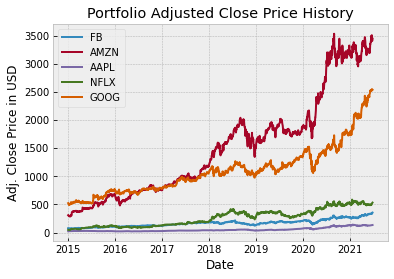

In [7]:
#Let's plot the graph
for c in df.columns.values:
  plt.plot(df[c], label = c)

plt.title('Portfolio Adjusted Close Price History')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price in USD')
plt.legend(df.columns.values, loc = 'upper left')
plt.show()

###Now, let's take a look at the daily returns of the stocks

In [8]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.020846
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.023177
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.001713
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003153
...,...,...,...,...,...
2021-06-22,0.020283,0.014905,0.012698,0.023783,0.004306
2021-06-23,0.004601,-0.000462,-0.002090,0.007704,-0.004236
2021-06-24,0.007604,-0.015623,-0.002169,0.010376,0.006488


###Now, let's create an annualised covariance matrix.

In [9]:
annual_cov_matrix = returns.cov() * 252
annual_cov_matrix

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.100953,0.058345,0.054207,0.059814,0.056890
AMZN,0.058345,0.093058,0.050321,0.068217,0.053020
AAPL,0.054207,0.050321,0.087012,0.051807,0.047746
NFLX,0.059814,0.068217,0.051807,0.177761,0.054584
GOOG,0.056890,0.053020,0.047746,0.054584,0.072366


###Now, calculate the portfolio variance

In [10]:
port_var = np.dot(weights.T, np.dot(annual_cov_matrix, weights))
port_var

0.06564199866408042

###Calculation of portfolio volatility or standard deviation

In [11]:
port_vol = np.sqrt(port_var);
port_vol

0.2562069449957991

###Calculate the annual portfolio return

In [12]:
annual_port_return = np.sum(returns.mean() * weights) * 252
annual_port_return

0.34834599570367614

###Let's take a look at the expected returns, volatility(risk) and variance.

In [13]:
percent_var = str( round(port_var, 3) * 100) + '%'
percent_vol = str( round(port_vol, 3) * 100) + '%'
percent_return = str( round(annual_port_return, 3) * 100) + '%'

print("Expected Annual return: " + percent_return)
print("Expected Volatility: " + percent_vol)
print("Expected Variance: " + percent_var)

Expected Annual return: 34.8%
Expected Volatility: 25.6%
Expected Variance: 6.6000000000000005%


## **Observation:**

*   Looking at the above values, we can say that our portfolio has performed well over the time period chosen with the annual returns of nearly 35% with risk nearly 25%.
*   But I think we can do better in terms of annual returns. So, let's dive in again to look what we can do to get better results.



###**Install PyPorlfolioOpt** to use **Efficient Frontier**


In [14]:
pip install PyPortfolioOpt

###Let's import the library which we downloaded above

In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

## **Portfolio Optimisation!**



In [16]:
#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
#mu stands for mean in mathematics

S = risk_models.sample_cov(df)

print(mu)
print(S)

FB      0.262870
AMZN    0.451401
AAPL    0.298576
NFLX    0.441800
GOOG    0.275953
dtype: float64
            FB      AMZN      AAPL      NFLX      GOOG
FB    0.100953  0.058345  0.054207  0.059814  0.056890
AMZN  0.058345  0.093058  0.050321  0.068217  0.053020
AAPL  0.054207  0.050321  0.087012  0.051807  0.047746
NFLX  0.059814  0.068217  0.051807  0.177761  0.054584
GOOG  0.056890  0.053020  0.047746  0.054584  0.072366


##Now, Optimise for the **Maximum Sharpe Ratio**

* Sharpe Ratio basically tells us about how much access returns can we get for some extra amount of volatility/risk.

* It basically measures the performance of a risky investment and compares it to the performance of a risk-free investment.

[Click here to know more about Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp)



In [17]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print(cleaned_weights)

print(ef.portfolio_performance(verbose = True))

OrderedDict([('FB', 0.0), ('AMZN', 0.73961), ('AAPL', 0.11137), ('NFLX', 0.14902), ('GOOG', 0.0)])
Expected annual return: 43.3%
Annual volatility: 28.5%
Sharpe Ratio: 1.45
(0.4329506409953513, 0.2845673427761628, 1.4511526058004949)


# **Observation:**

The results above show a clear and astonishing development.

By increasing the risk by 10% of what it actually was, we get 25% more annual returns of what they actually were.


So, we can say that now we have got a more optimised portfolio.

###**Let's take a look that how much percentage of our money should we invest in each stock**

In [18]:
# Convert cleaned_weights (type : Collections.OrderDict) into a list
items = list(cleaned_weights.items())

print("")
for stock in range(0,5):
  print(items[stock][0], "-> ", items[stock][1] * 100, "%")


FB ->  0.0 %
AMZN ->  73.961 %
AAPL ->  11.137 %
NFLX ->  14.902000000000001 %
GOOG ->  0.0 %


#**Conclusion:**


*   By taking less risk and being impartial towards every stock in our portfolio, we will get a good annual return.

*   But, by optimising the portfolio using Sharpe Ratio, we can see that taking a little bit of more risk can give us better annual return.

*   We also come to know about what percentage of our money should we invest in a particular stock to get those better results.



